In [21]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

## 1. Create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [3]:
x = np.linspace(0,100,10)
y = line(.25, x, b = 0,  errors = errors)

Text(0.5,1,'Plot of Uncertainty For My Line')

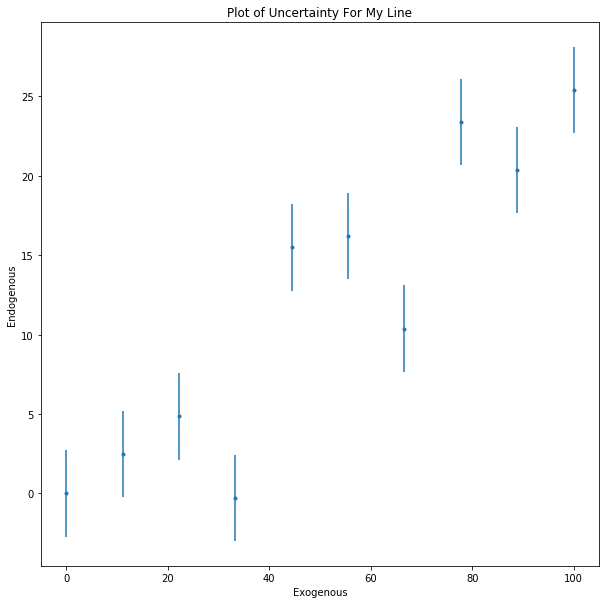

In [7]:
fig = pl.figure(figsize=(10,10))
plt.errorbar(x, y, yerr=e, fmt='.')
xlabel('Exogenous')
ylabel('Endogenous')
title('Plot of Uncertainty For My Line')

Here is a plot of the uncertainty to show y versus x as lines (errorbars). The slope was 1/4 and the y intercept was 0.

## 2. Print y, x, and the result of applying statsmodels.api.add_constant() to x

In [8]:
print("y is equal to: %s" % (y))

y is equal to: [  0.           2.49668796   4.84558848  -0.27894965  15.48813882
  16.21792077  10.37064975  23.38691323  20.36212949  25.38277365]


In [9]:
print( 'x is equal to: %s' % (x))

x is equal to: [   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


In [10]:
result = sm.add_constant(x) # save this for making the model 
print( 'the result of applying statsmodels.api.add_constant() to x, is equal to: %s' % (result))

the result of applying statsmodels.api.add_constant() to x, is equal to: [[   1.            0.        ]
 [   1.           11.11111111]
 [   1.           22.22222222]
 [   1.           33.33333333]
 [   1.           44.44444444]
 [   1.           55.55555556]
 [   1.           66.66666667]
 [   1.           77.77777778]
 [   1.           88.88888889]
 [   1.          100.        ]]


## 3. Print the model summary for each and discuss the differences

### The Wrong Way

In [11]:
# use statsmodels.api.OLS to fit x and y
smfitW = sm.OLS(y, x).fit()
smfitW.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     120.0
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.67e-06
Time:                        19:48:29   Log-Likelihood:                -27.949
No. Observations:                  10   AIC:                             57.90
Df Residuals:                       9   BIC:                             58.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2437      0.022     10.954      0.000         0.193     0.294
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   2.895
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                0.849
Skew:                          -0.690   Prob(JB):                        0.654
Kurtosis:                       2.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Right Way

In [12]:
# use statsmodels.api.OLS to fit x and y
smfitR = sm.OLS(y, result).fit()
smfitR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     36.50
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000309
Time:                        19:48:32   Log-Likelihood:                -27.806
No. Observations:                  10   AIC:                             59.61
Df Residuals:                       8   BIC:                             60.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2334      2.565     -0.481      0.643        -7.147     4.681
x1             0.2612      0.043      6.041      0.000         0.162     0.361
==============================================================================
Omnibus:                        1.667   Durbin-Watson:                   2.978
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                0.945
Skew:                          -0.715   Prob(JB):                        0.623
Kurtosis:                       2.527   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to have a 2D array for x because OLS uses matrix algebra to output both a, b…otherwise it would only output a, without the intercept. <br><br>
Notice how the R-squared value is dramatically lower (but probably more accurate) when we do it right. This makes sense because it should have a lower value due to the more robust fit. In other words, about 60% of the data is explained by the model when we do it right, whereas a value of 88% seems far too high. <br>


## 4. Plot the data (as points) and both statsmodels fits

In [13]:
# Create the function for each regression model.
smfitW_y = x * smfitW.params[0] 
smfitR_y = x * smfitR.params[1] + smfitR.params[0]

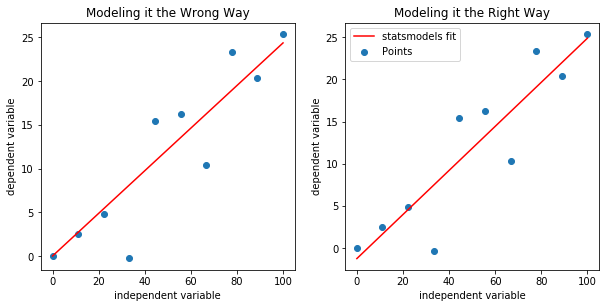

In [14]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "Points")
ax.plot(x, smfitW_y, 'r', label = "Wrong Model")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.set_title('Modeling it the Wrong Way')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "Points")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(x, smfitR_y, 'r', 
         label = "statsmodels fit")
ax2.set_title('Modeling it the Right Way')
ax2.legend()

Both models look similar, where same points are above and below the line. However the second model (right one) doesn't start at 0,0 intercept, it has an accurate intercept (because we did it right). This is the point that changes everything. Just by eyeing it, the right model seems to have a little less steep of a slope. 

## 5. Create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [37]:
xI = np.linspace(2,100,10)
yI = line(.25, x, b = 500*.25,  errors = errors)

Text(0.5,1,'Plot of Uncertainty For My Line When Inctercept is 125')

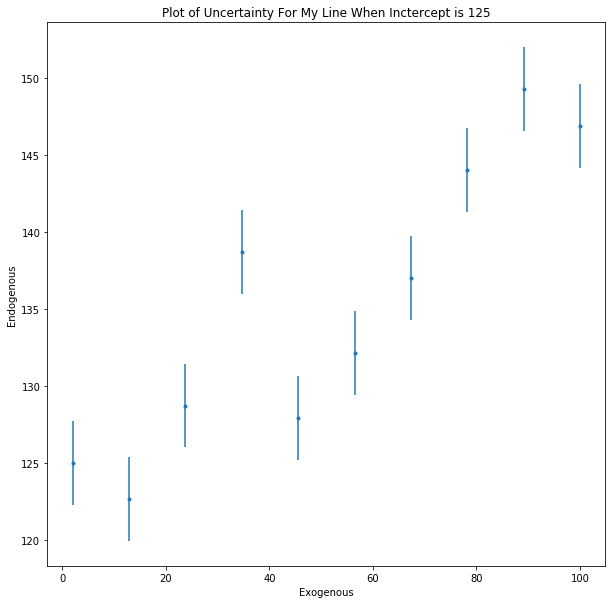

In [38]:
fig = pl.figure(figsize=(10,10))
plt.errorbar(xI, yI, yerr=e, fmt='.')
xlabel('Exogenous')
ylabel('Endogenous')
title('Plot of Uncertainty For My Line When Inctercept is 125')

Here is a graph that shows the error bars for my line that has an intercept of 125 and slope of 1/4. 

## 5.3 Print the model summary for each and discuss the differences

### The Wrong Way

In [39]:
# use statsmodels.api.OLS to fit x and y
smfitIW = sm.OLS(yI, xI).fit()
smfitIW.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     31.35
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000335
Time:                        20:04:43   Log-Likelihood:                -55.781
No. Observations:                  10   AIC:                             113.6
Df Residuals:                       9   BIC:                             113.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9969      0.357      5.599      0.000         1.190     2.804
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.634
Skew:                           0.049   Prob(JB):                        0.728
Kurtosis:                       1.770   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Right Way

In [40]:
resultI = sm.add_constant(xI) # save this for making the model 

In [41]:
# use statsmodels.api.OLS to fit x and y
smfitIR = sm.OLS(yI, resultI).fit()
smfitIR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     32.93
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000435
Time:                        20:04:47   Log-Likelihood:                -27.894
No. Observations:                  10   AIC:                             59.79
Df Residuals:                       8   BIC:                             60.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        122.2211      2.663     45.902      0.000       116.081   128.361
x1             0.2554      0.045      5.738      0.000         0.153     0.358
==============================================================================
Omnibus:                        0.373   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.410
Skew:                           0.341   Prob(JB):                        0.814
Kurtosis:                       2.279   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again we have an R-squared value is lower when we do it right. This makes sense because it should have a lower value due to the more robust fit when including the intercept. <br>

<br>
Furthermore, the AIC and BIC are smaller when we do it right, indicating we are over-fitting our model less. Compare this to when the intercept was 0 and the BIC and AIC were relatively similar between the right and wrong way modeling. Perhaps now because the intercept is higher relative to the points, it has a more extreme effect to the fit.


## 5.4 Plot the data (as points) and both statsmodels fits

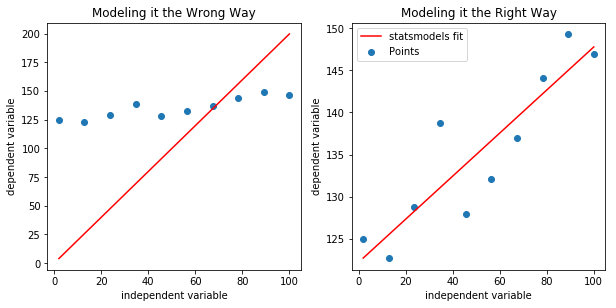

In [42]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(xI, yI, label = "Points")
ax.plot(xI, smfitIW.fittedvalues, 'r', label = "Wrong Model")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.set_title('Modeling it the Wrong Way')
ax2 = fig.add_subplot(222)
ax2.scatter(xI, yI, label = "Points")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xI, smfitIR.fittedvalues, 'r', 
         label = "statsmodels fit")
ax2.set_title('Modeling it the Right Way')
ax2.legend()

Now the wrong way totally looks off because we don't have an intercept defined for our model. Whereas the right way looks pretty on point. 

## 6 Now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

#### How to make the Weights?
A rule of thumb is that the weights would be the inverse (remember: larger error must mean smaller weight) of the variance, which is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [33]:
# Rohun did this
def weights(x):
    var = np.sqrt(np.std(x))
    x = 1 / (x * var)
    return x


In [34]:
x

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [31]:
xI

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [43]:
weights(xI)

array([ 0.089404  ,  0.01387304,  0.00751996,  0.00515792,  0.00392505,
        0.00316786,  0.00265556,  0.0022859 ,  0.00200657,  0.00178808])

In [50]:
xI

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [35]:
rm = sm.WLS(y, x, weights = std(np.sqrt(xI)))

### The Wrong Way

In [44]:
# use statsmodels.api.WLS to fit x and y
rmfitIW = sm.WLS(yI, resultI ,weights = weights(xI) ).fit()
rmfitIW.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            WLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     31.54
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000501
Time:                        20:05:16   Log-Likelihood:                -28.049
No. Observations:                  10   AIC:                             60.10
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        124.0175      1.031    120.267      0.000       121.640   126.395
x1             0.2202      0.039      5.616      0.001         0.130     0.311
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.220
Skew:                           0.012   Prob(JB):                        0.896
Kurtosis:                       2.273   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Right Way

In [19]:
resultI = sm.add_constant(xI) # save this for making the model 

In [48]:
# use statsmodels.api.WLS to fit x and y
wmfitIR = sm.WLS(yI, resultI,weights=yI).fit()
wmfitIR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            WLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     8.752
Date:                Fri, 09 Nov 2018   Prob (F-statistic):             0.0182
Time:                        13:28:35   Log-Likelihood:                -30.728
No. Observations:                  10   AIC:                             65.46
Df Residuals:                       8   BIC:                             66.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        126.8052      3.515     36.076      0.000       118.700   134.911
x1             0.1725      0.058      2.958      0.018         0.038     0.307
==============================================================================
Omnibus:                        0.590   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.004
Skew:                          -0.022   Prob(JB):                        0.998
Kurtosis:                       2.907   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again we have an R-squared value is lower when we do it right. This makes sense because it should have a lower value due to the more robust fit when including the intercept. <br>

<br>
Furthermore, the AIC and BIC are smaller when we do it right, indicating we are over-fitting our model less. Compare this to when the intercept was 0 and the BIC and AIC were relatively similar between the right and wrong way modeling. Perhaps now because the intercept is higher relative to the points, it has a more extreme effect to the fit.


## 5.4 Plot the data (as points) and both statsmodels fits

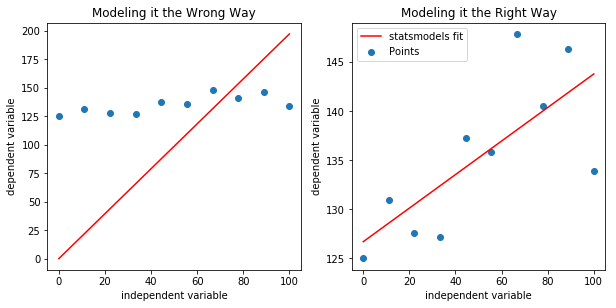

In [33]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(xI, yI, label = "Points")
ax.plot(xI, smfitIW.fittedvalues, 'r', label = "Wrong Model")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.set_title('Modeling it the Wrong Way')
ax2 = fig.add_subplot(222)
ax2.scatter(xI, yI, label = "Points")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xI, smfitIR.fittedvalues, 'r', 
         label = "statsmodels fit")
ax2.set_title('Modeling it the Right Way')
ax2.legend()

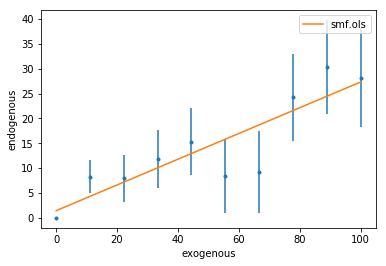

In [40]:

# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
#pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

In [43]:
#statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smmodel = sm.WLS(y ~ x + const,yI).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
#pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

SyntaxError: invalid syntax (<ipython-input-43-f3919b780ea1>, line 3)